<a href="https://colab.research.google.com/github/6058ah/BusinessCapstone/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%BC_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D%EC%9D%84_%ED%86%B5%ED%95%9C_ETF_%EB%A7%A4%EB%A7%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 텍스트 마이닝을 통한 ETF 주가 예측

#간단 EDA

In [1]:
!pip install pykrx

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [3]:
import matplotlib.font_manager as fm
fm._rebuild()
## 런타임 다시 시작 필수

In [1]:
from pykrx import stock
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

tickers = stock.get_etf_ticker_list('20210430')
tickers = pd.DataFrame(tickers,columns = ['종목코드'])

url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df=df[['itemcode','itemname']]
df=df.rename(columns={'itemcode':'종목코드','itemname':'종목명'})

etf = pd.merge(left = tickers, right = df, how = 'left', on= '종목코드')
battery_etf = etf[etf['종목명'].str.contains('2차전지')]
battery_etf = battery_etf.drop(index=122)
battery_etf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


,종목코드,종목명
116,305540,TIGER 2차전지테마
240,305720,KODEX 2차전지산업


In [2]:
stocks = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  price = stock.get_etf_ohlcv_by_date("20180912","20210430",b)
  stocks[a]=price['종가'].values[:].tolist()
prices = pd.DataFrame(stocks)
prices.index = price.index
prices

,TIGER 2차전지테마,KODEX 2차전지산업
날짜,,
2018-09-12,9805,9810
2018-09-13,9805,9775
2018-09-14,9915,9935
2018-09-17,10015,9990
2018-09-18,10220,10170
...,...,...
2021-04-26,18705,19720
2021-04-27,18600,19795
2021-04-28,18250,19500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


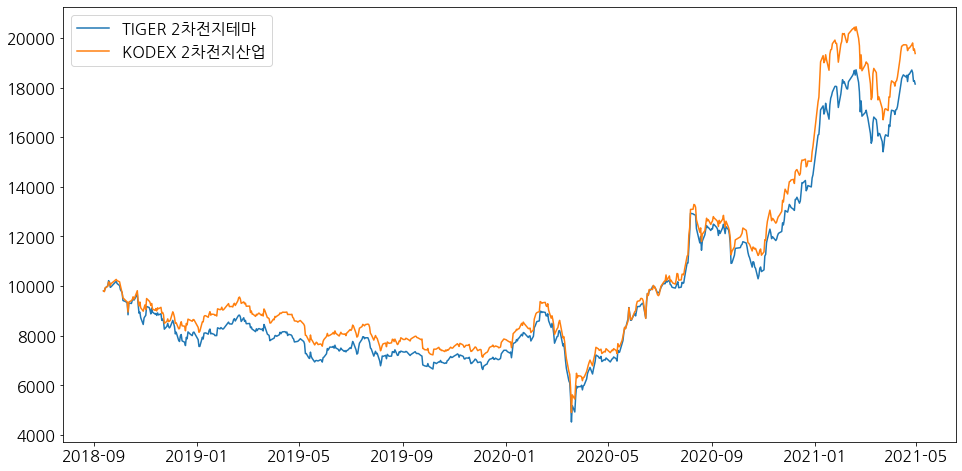

In [3]:
stocks = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  price = stock.get_etf_ohlcv_by_date("20180912","20210430",b)
  stocks[a]=price['종가'].values[:].tolist()
prices = pd.DataFrame(stocks)
prices.index = price.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(prices)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt.show()

##괴리율

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


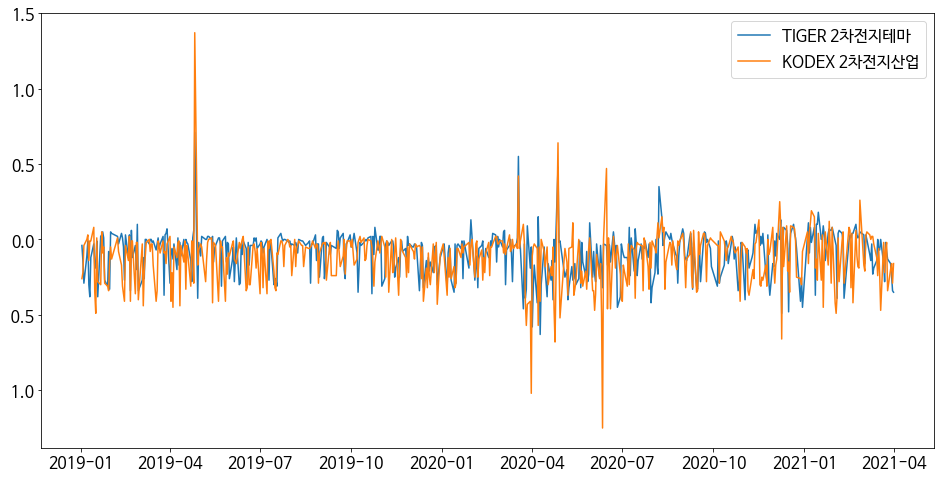

In [4]:
deviation = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  dev = stock.get_etf_price_deviation("20190101","202104016",b)
  deviation[a]=dev['괴리율'].values[:].tolist()
deviations = pd.DataFrame(deviation)
deviations.index = dev.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(deviations)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt

##2차전지 테마 구성종목 수

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

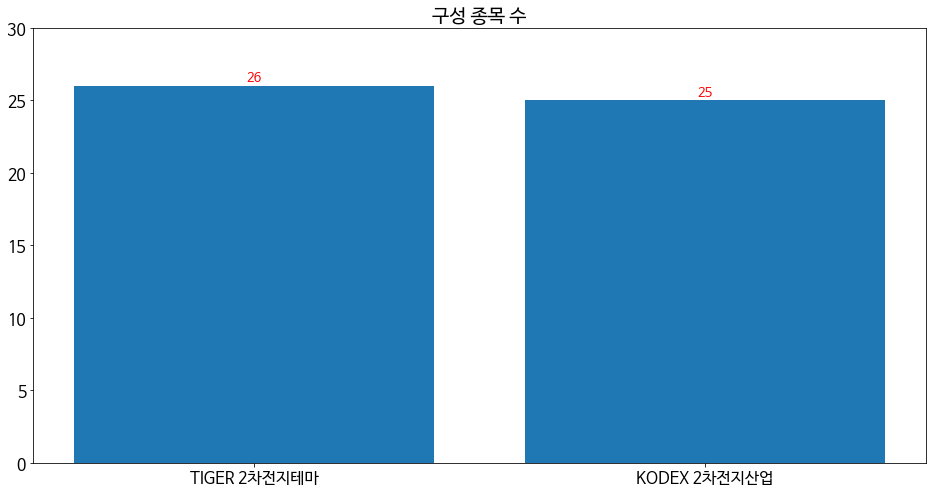

In [5]:
tiger = stock.get_etf_portfolio_deposit_file('305540','20210416')
kodex = stock.get_etf_portfolio_deposit_file('305720','20210416')

len_tiger = len(tiger)
len_kodex = len(kodex)

port = pd.DataFrame([len_tiger, len_kodex], index = ['TIGER 2차전지테마','KODEX 2차전지산업'])
port.columns = ['구성 종목 수']

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.bar(port.index, port['구성 종목 수'])

for x,y in enumerate(list(port['구성 종목 수'])):
  plt.text(x,y,y, fontsize = 13, color = '#ff0000', horizontalalignment='center', verticalalignment = 'bottom')

plt.ylim(0,30)
plt.title('구성 종목 수')
plt

##총 보유자산 비교

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

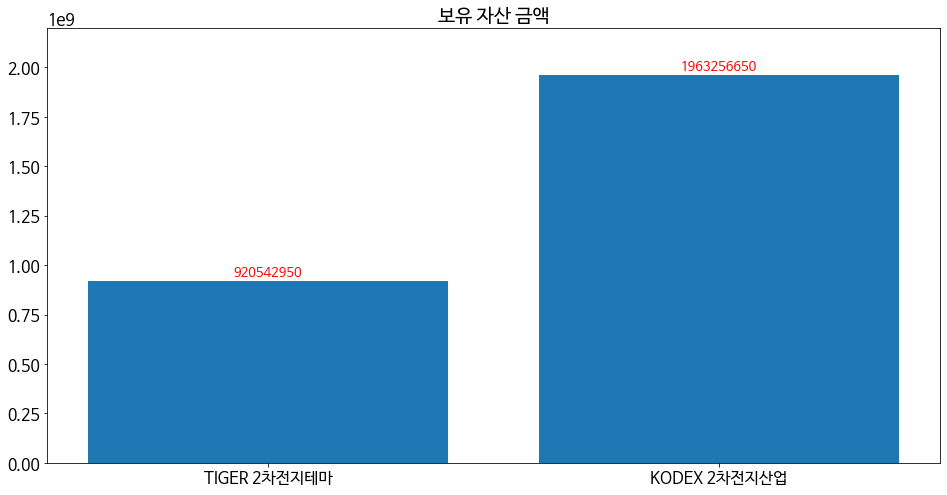

In [6]:
ti_asset = tiger['금액'].sum()
kd_asset = kodex['금액'].sum()

assets = pd.DataFrame([ti_asset, kd_asset], index = ['TIGER 2차전지테마','KODEX 2차전지산업'])
assets.columns = ['보유 자산 금액']

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.bar(assets.index, assets['보유 자산 금액'])

for x,y in enumerate(list(assets['보유 자산 금액'])):
  plt.text(x,y,y, fontsize = 13, color = '#ff0001', horizontalalignment='center', verticalalignment = 'bottom')

plt.ylim(0, 2200000000)
plt.title('보유 자산 금액')
plt

##구성종목 비중 TOP 10

In [7]:
df1=pd.merge(left=tiger['비중'],right=kodex['비중'], how = 'outer', left_on=tiger.index, right_on=kodex.index)
df1= df1.set_index('key_0')
df1.columns = ['TIGER 2차전지테마','KODEX 2차전지산업']
df1=df1.fillna(0)
df2=df1[:10]
df2.index = [stock.get_market_ticker_name(x) for x in df2.index]
df2

,TIGER 2차전지테마,KODEX 2차전지산업
SK이노베이션,10.93,16.090000
SKC,10.23,0.000000
LG화학,10.17,16.250000
삼성SDI,9.74,13.730000
포스코케미칼,9.60,17.780001
에코프로비엠,6.44,3.610000
일진머티리얼즈,6.42,3.710000
엘앤에프,6.28,3.910000
솔브레인,5.25,0.000000
에코프로,4.79,12.860000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


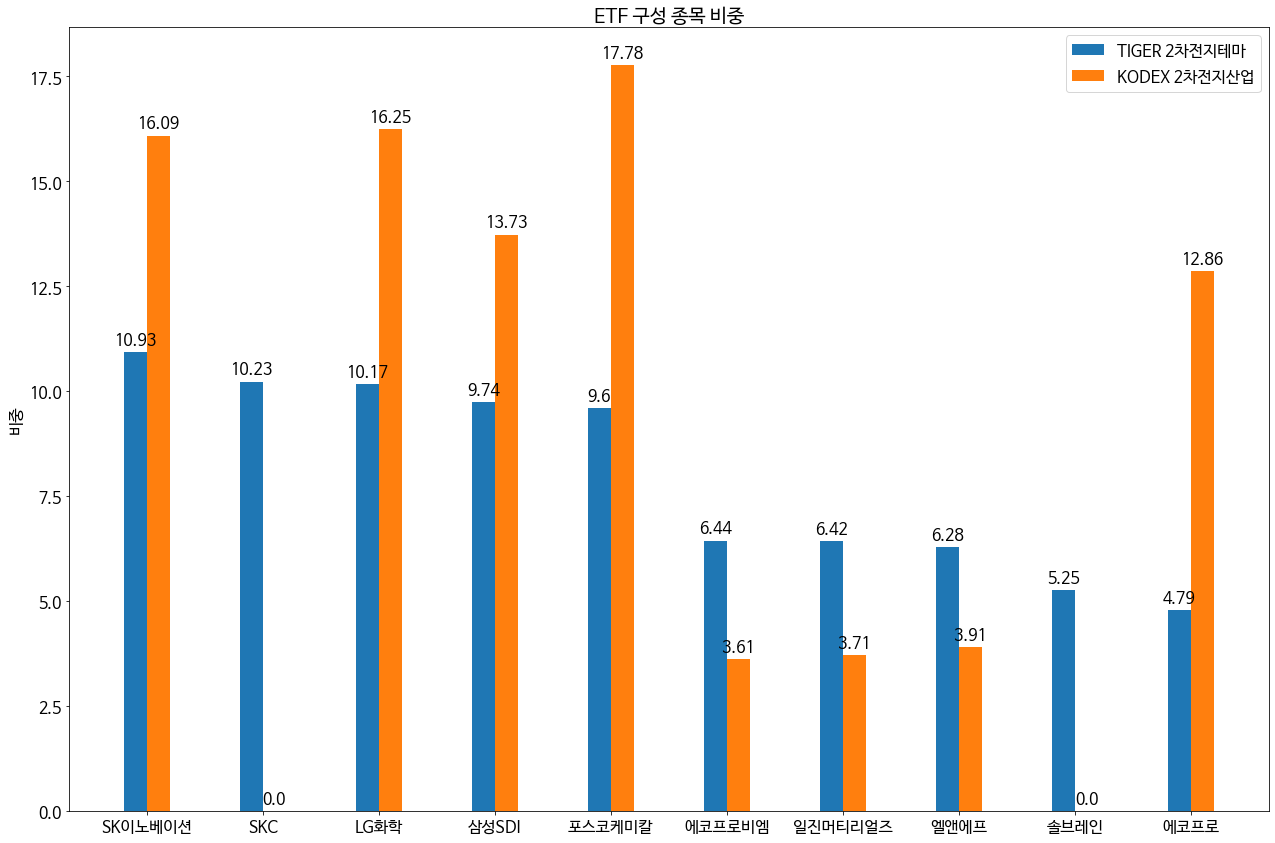

In [8]:
df2['TIGER 2차전지테마'] = df2['TIGER 2차전지테마'].apply(lambda x: float('{:.2f}'.format(x)))
df2['KODEX 2차전지산업'] = df2['KODEX 2차전지산업'].apply(lambda x: float('{:.2f}'.format(x)))

import numpy as np


plt.rc('font', family='NanumBarunGothic', size =16) 

fig, ax = plt.subplots(figsize = (18,12))
x = np.arange(len(df2.index))
width = 0.20

rects1 = ax.bar(x-(width/2), df2['TIGER 2차전지테마'], width, label = 'TIGER 2차전지테마')
rects2 = ax.bar(x+(width/2), df2['KODEX 2차전지산업'], width, label = 'KODEX 2차전지산업')

ax.set_ylabel('비중')
ax.set_title('ETF 구성 종목 비중')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(df2.index)

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),xy=(rect.get_x()+rect.get_width()/2, height),xytext=(0,3), textcoords = 'offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Case 1. 과거 종가만 사용

###데이터 준비

In [9]:
Tiger = prices.iloc[:,0]
Kodex = prices.iloc[:,1]

In [10]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

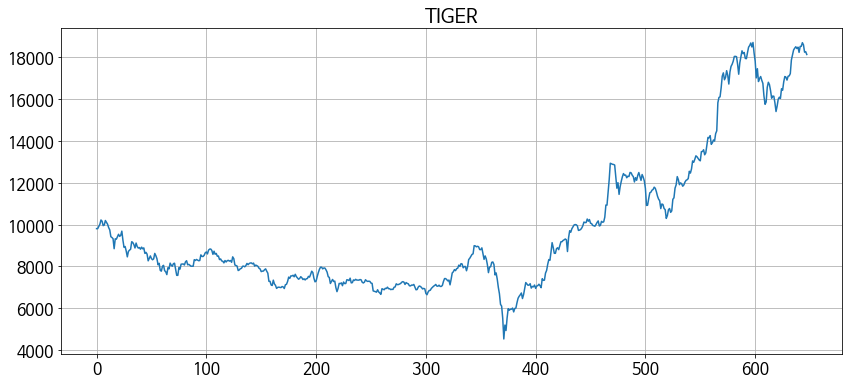

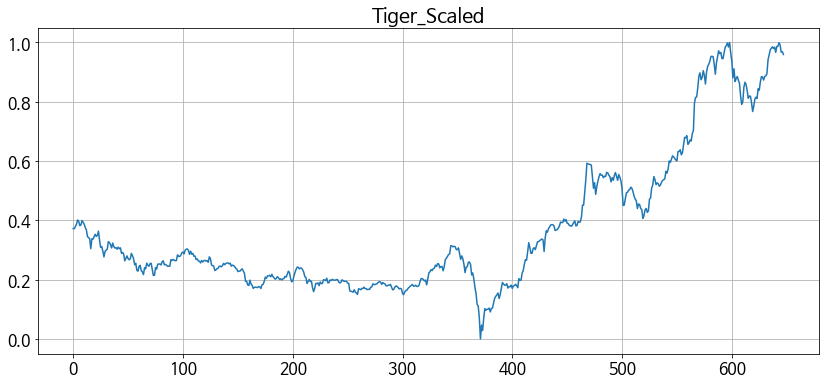

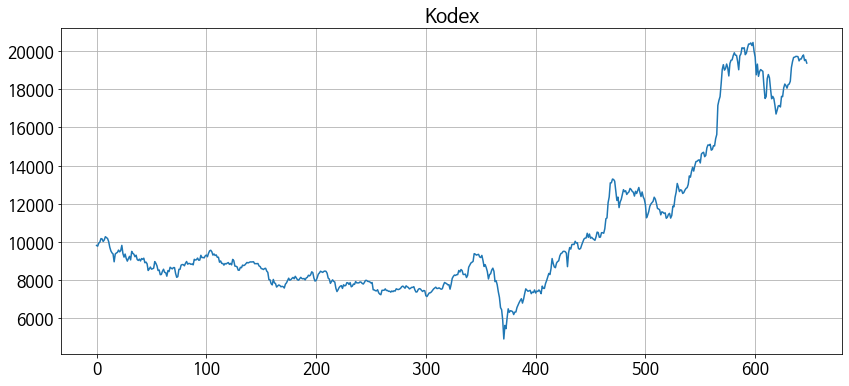

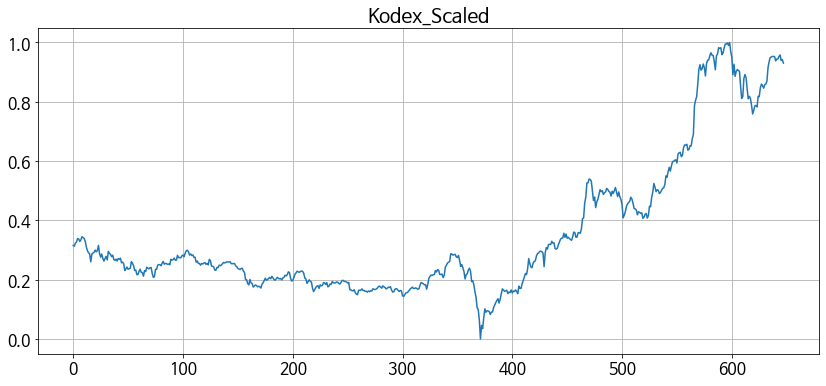

In [11]:
Tiger = np.array(Tiger).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

Kodex = np.array(Kodex).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Kodex")
plt.grid()
plt.plot(Kodex)

sc = MinMaxScaler()
KodexSC = sc.fit_transform(Kodex)
plt.figure(figsize=(14,6))
plt.title("Kodex_Scaled")
plt.grid()
plt.plot(KodexSC)

In [12]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y) # array()함수의 인자로 리스트를 넣어 Numpy 배열을 생성시킴
print(X.shape, y.shape)

(647, 1) (647,)


In [13]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]    

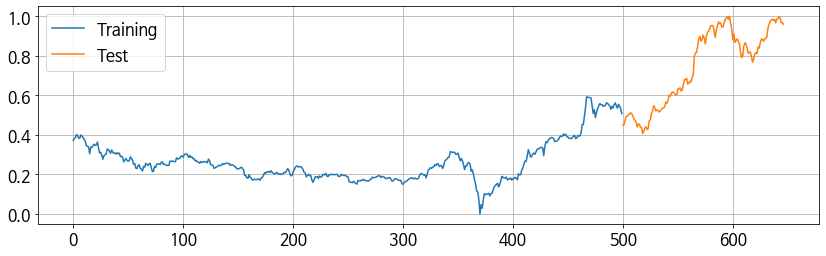

In [14]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [15]:
X_train = X_train.reshape(-1,1,1)
X_test = X_test.reshape(-1,1,1)

In [16]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 6ms/step - loss: 0.2503
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1951
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0962
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0856
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0875
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0707
Epoch 8/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0755


###결과

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             4352      
_________________________________________________________________
dropout (Dropout)            (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8

In [18]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Price')

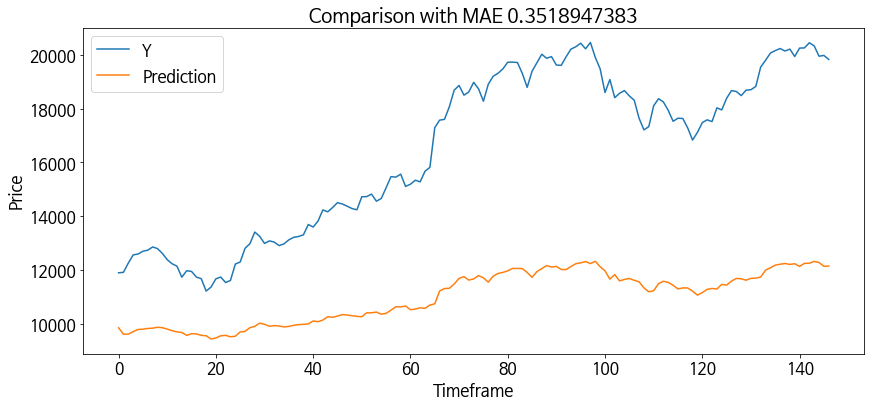

In [19]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [20]:
err_model1 = regressor.evaluate(X_test, y_test, batch_size=30)
models = pd.DataFrame({
    'Model': ['LSTM with one sequence'],
    'Score': [err_model1]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 3ms/step - loss: 0.3519


,Model,Score
0,LSTM with one sequence,0.351895


## Case 2. 기술적 지표 추가

###데이터 준비

In [21]:
def get_macd(df, short=12, long=26, t=9):
  df = pd.DataFrame(df)
  ma_12 = df['종가'].ewm(span=12).mean()
  ma_26 = df['종가'].ewm(span=26).mean()
  macd = ma_12 - ma_26
  macds = macd.ewm(span=9).mean()
  macdo = macd - macds
  df = df.assign(macd=macd, macds=macds, macdo=macdo).dropna()
  return df


In [22]:
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=9b023add29d330d685027852eda28e64c449cccfe517f103ce452cec6e40f149
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [23]:
from ta.utils import dropna
from ta.volatility import BollingerBands
#Tiger
Tiger = stock.get_etf_ohlcv_by_date("20180912","20210430",'305540')
Tiger = get_macd(Tiger)

# Clean NaN values
Tiger = dropna(Tiger)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=Tiger["종가"], window=20, window_dev=2)

# Add Bollinger Bands features
Tiger['bb_bbm'] = indicator_bb.bollinger_mavg()
Tiger['bb_bbh'] = indicator_bb.bollinger_hband()
Tiger['bb_bbl'] = indicator_bb.bollinger_lband()

Tiger = Tiger.dropna(axis=0)

Tiger.drop(['NAV','시가','고가','저가','거래량','거래대금','기초지수'],axis=1,inplace=True)
Tiger

,종가,macd,macds,macdo,bb_bbm,bb_bbh,bb_bbl
날짜,,,,,,,
2018-10-18,9435,-107.845213,-99.374469,-8.470744,9706.50,10459.859808,8953.140192
2018-10-19,9485,-97.964010,-99.090702,1.126692,9685.00,10437.874492,8932.125508
2018-10-22,9685,-75.383826,-94.326830,18.943004,9668.50,10406.030338,8930.969662
2018-10-23,9250,-87.173215,-92.890681,5.717467,9620.00,10333.260121,8906.739879
2018-10-24,8910,-119.202672,-98.169032,-21.033639,9557.50,10289.357227,8825.642773
...,...,...,...,...,...,...,...
2021-04-26,18705,512.203780,425.322976,86.880804,17723.00,19259.253234,16186.746766
2021-04-27,18600,506.255144,441.509410,64.745734,17828.00,19301.313952,16354.686048
2021-04-28,18250,467.905015,446.788531,21.116484,17919.00,19254.015356,16583.984644


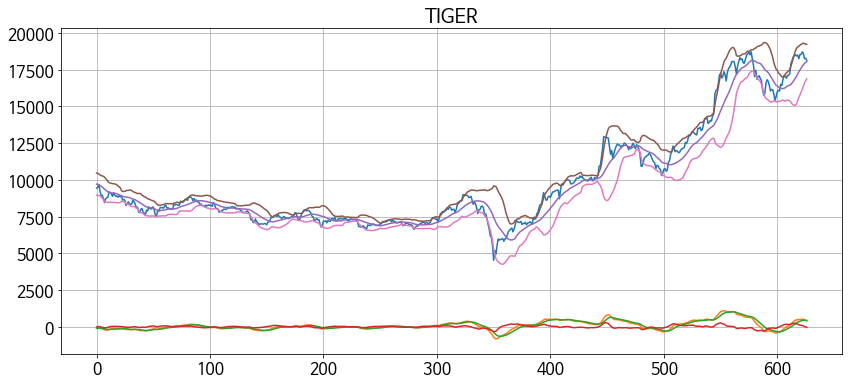

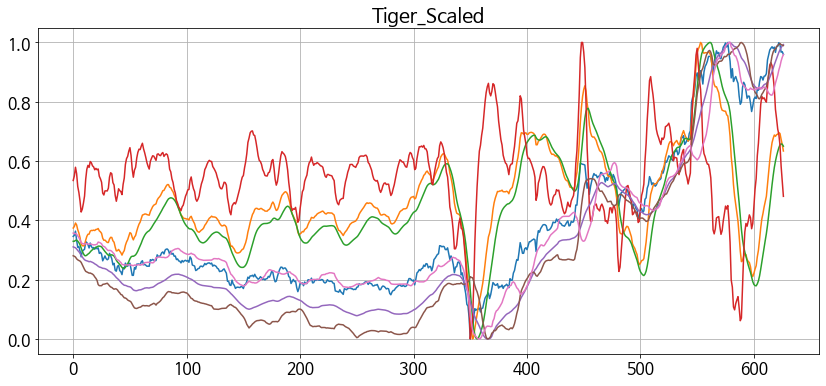

In [24]:
Tiger = np.array(Tiger).reshape(-1,7)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

In [25]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0:7])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y) # array()함수의 인자로 리스트를 넣어 Numpy 배열을 생성시킴
print(X.shape, y.shape)

(626, 1, 7) (626,)


In [26]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]    

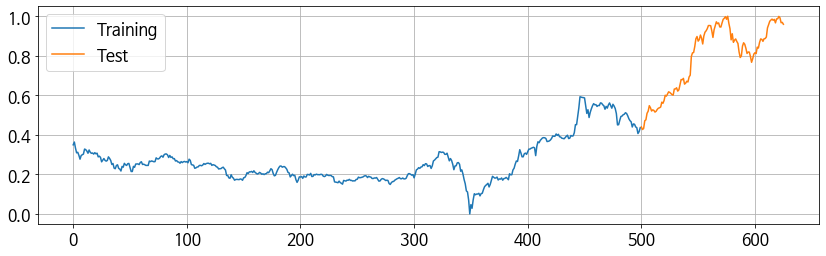

In [27]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [28]:
X_train = X_train.reshape(-1,1,7)
X_test = X_test.reshape(-1,1,7)

###LSTM

In [29]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],7)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 5ms/step - loss: 0.2545
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1894
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0942
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0751
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0721
Epoch 8/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0600
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0533


###결과

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 32)             5120      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)               

Text(0, 0.5, 'Price')

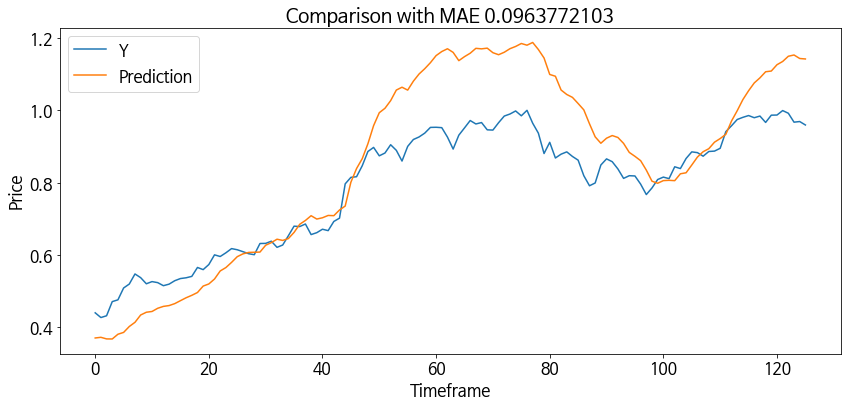

In [32]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [33]:
err_model2 = regressor.evaluate(X_test, y_test, batch_size=30)

models = pd.DataFrame({
    'Model': ['LSTM with Only Close', 'LSTM with Close, Technical Analysis'],
    'Score': [err_model1,err_model2]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 3ms/step - loss: 0.0964


,Model,Score
1,"LSTM with Close, Technical Analysis",0.096377
0,LSTM with Only Close,0.351895


##Case 3. 2차산업관련 뉴스 감성 점수 추가

###데이터 준비

In [34]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 6.4MB/s 


In [35]:
#Tiger
Tiger = stock.get_etf_ohlcv_by_date("20180912","20210430",'305540')
Tiger = get_macd(Tiger)

# Clean NaN values
Tiger = dropna(Tiger)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=Tiger["종가"], window=20, window_dev=2)

# Add Bollinger Bands features
Tiger['bb_bbm'] = indicator_bb.bollinger_mavg()
Tiger['bb_bbh'] = indicator_bb.bollinger_hband()
Tiger['bb_bbl'] = indicator_bb.bollinger_lband()

Tiger = Tiger.dropna(axis=0)

Tiger.drop(['NAV','시가','고가','저가','거래량','거래대금','기초지수'],axis=1,inplace=True)
Tiger

,종가,macd,macds,macdo,bb_bbm,bb_bbh,bb_bbl
날짜,,,,,,,
2018-10-18,9435,-107.845213,-99.374469,-8.470744,9706.50,10459.859808,8953.140192
2018-10-19,9485,-97.964010,-99.090702,1.126692,9685.00,10437.874492,8932.125508
2018-10-22,9685,-75.383826,-94.326830,18.943004,9668.50,10406.030338,8930.969662
2018-10-23,9250,-87.173215,-92.890681,5.717467,9620.00,10333.260121,8906.739879
2018-10-24,8910,-119.202672,-98.169032,-21.033639,9557.50,10289.357227,8825.642773
...,...,...,...,...,...,...,...
2021-04-26,18705,512.203780,425.322976,86.880804,17723.00,19259.253234,16186.746766
2021-04-27,18600,506.255144,441.509410,64.745734,17828.00,19301.313952,16354.686048
2021-04-28,18250,467.905015,446.788531,21.116484,17919.00,19254.015356,16583.984644


In [39]:
#dates = [date.strftime("%Y.%m.%d") for date in Tiger.index]

In [40]:
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import pandas as pd
import re

title_text=[]
contents_text=[]
dates_text = []
#result=[]

#엑셀로 저장하기 위한 변수
RESULT_PATH ='/content/drive'  #결과 저장할 경로

#날짜 범위 리스트로 만들기
def date_range(start, end):
    start = datetime.strptime(start, "%Y.%m.%d")
    end = datetime.strptime(end, "%Y.%m.%d")
    dates = [date.strftime("%Y.%m.%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates

#def contents_cleansing(contents):
#    first_cleansing_contents = re.sub('<dl>.*?</a> </div> </dd> <dd>', '',str(contents)).strip()  #앞에 필요없는 부분 제거
#    second_cleansing_contents = re.sub('<ul class="relation_lst">.*?</dd>', '', first_cleansing_contents).strip()#뒤에 필요없는 부분 제거 (새끼 기사)
#    third_cleansing_contents = re.sub('<.+?>', '', second_cleansing_contents).strip()
#    contents_text.append(third_cleansing_contents)
#    #print(contents_text)

#크롤링 시작
def crawler(query,s_date,e_date):
  dates= [date.strftime("%Y.%m.%d") for date in Tiger.index]
  page_num = [1,11,21,31,41]
  #maxpage_t =41
  for x in dates:
    #print(x)
    for page_number in page_num:
      ds = x.replace(".","")
      de = ds
      url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0"+"&ds=" + x + "&de=" + x + "&nso=so%3Ar%2Cp%3Afrom" + ds + "to" + de + "%2Ca%3A&start=" + str(page_number)
      #url = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort={1}&photo=0&field=0&reporter_article=&pd=3&ds={2}&de={2}&docid=&nso=so:r,p:,a:all&mynews=1&cluster_rank=238&start={3}&refresh_start=0".format(query,sort,x,str(page_num))
      #print(url)
      response = requests.get(url)
      html = response.text

      #뷰티풀소프의 인자값 지정
      soup = BeautifulSoup(html, 'html.parser')

      #뉴스 날짜
#      bbs = soup.find_all('span', 'info')
#      for bb in bbs:
#        t = bb.text
#        dates_text.append(t)
#      search = "면"
#      for word in dates_text:
#        if search in word: 
#          dates_text.remove(word)


      #<a>태그에서 제목과 링크주소 (a 태그 중 class 명이 news_tit인 것)
      atags = soup.find_all('a', 'news_tit')
      for atag in atags:
        title = atag.get('title')
        title_text.append(title)     #제목
        dates_text.append(x)
            
      #본문요약본 (a 태그 중 class 명이 api_txt_lines dsc_txt_wrap인 것)
      #contents_lists = soup.find_all('a','api_txt_lines dsc_txt_wrap')
      #for contents_list in contents_lists:
      #  contents_cleansing(contents_list) #본문요약 정제화


      #모든 리스트 딕셔너리형태로 저장
      #result= {"Date":dates_text,"title":title_text}
      df1 = pd.DataFrame(dates_text)
      df2 = pd.DataFrame(title_text) #df로 변환
      result = pd.concat([df1,df2],axis=1)
      #print(result)

  outputFileName = '{0}~{1} {2} 관련 뉴스.xlsx'.format(s_date.replace(".",""), e_date.replace(".",""), query)
  writer = pd.ExcelWriter(outputFileName, engine='xlsxwriter')
  result.to_excel(writer, sheet_name= '{0}~{1} {2} 뉴스'.format(s_date.replace(".",""), e_date.replace(".",""), query))
  writer.save()

#메인함수
def main():
    info_main = input("="*50+"\n"+"입력 형식에 맞게 입력해주세요."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    query = input("검색어 입력: ") #네이버, 부동산...
    s_date = input("시작날짜 입력(예시:2019.01.01):")
    e_date = input("끝날짜 입력:")
    crawler(query,s_date, e_date)

In [106]:
main()

입력 형식에 맞게 입력해주세요.
 시작하시려면 Enter를 눌러주세요.
검색어 입력: 2차전지산업
시작날짜 입력(예시:2019.01.01):2018.10.18
끝날짜 입력:2021.04.30


In [41]:
!pip install konlpy

In [42]:
!git clone https://github.com/FinanceData/corpus.git

fatal: destination path 'corpus' already exists and is not an empty directory.


In [43]:
from konlpy.tag import Kkma

engine = Kkma()
polarity_dic = pd.read_csv('corpus/kosac/polarity.csv')
polarity_dic.set_index('ngram', inplace=True)

def polarity_score(text):
    pos_tags = engine.pos(text)

    # n-gram
    unigram = ['/'.join(p) for p in pos_tags]
    bigram = [';'.join(z) for z in zip(unigram, unigram[1:])]
    trigram = [';'.join(z) for z in zip(*[unigram[i:] for i in range(3)])]
    
    p_score = 0
    # polarity score = (p-n) / (p+n)
    for ngram in [unigram, bigram, trigram]:
        cond = polarity_dic.index.isin(ngram)
        s = polarity_dic.loc[cond, :].sum()
        if s['POS'] + s['NEG'] > 0: # div 0 방지
            p_score += (s['POS'] - s['NEG']) / (s['POS'] + s['NEG'])
    return p_score

In [ ]:
news = pd.read_excel('/content/20181018~20210430 2차전지산업 관련 뉴스.xlsx')

In [ ]:
news.columns = ['Count', 'Date', 'Title']
news.head()

In [113]:
news.loc[:,'Title']

0                          대보마그네틱 내달 코스닥 입성…"2차전지 수요로 고성장"
1                    삼성SDI LG화학 SK이노베이션, 중국 전기차배터리 구조조정 수혜
2                                        극우 현상? 한국도 다르지 않다
3                        '글로벌 EMF 1위' 대보마그네틱, 내달 코스닥 상장 앞둬
4                                 창원상의, 2018 창원지역상장사 IR 개최
                               ...                        
21400     [공석환의 주식시황] “공매도 걱정? 최근 10거래일 연기금 매수 많은 종목 따르는게"
21401    국민의힘 새 사령탑 김기현 신임 원내대표는 누구? | 한때 대선 잠룡.... 울산시...
21402                      SNE리서치, 전기차용 차세대 배터리 온라인 세미나 연다
21403               [전문가 칼럼] 스마트공장을 위한 현장의 로봇 적용 엔지니어링(3편)
21404                   LG상사, 1분기 영업익 1133억원 기록 '분기 사상 최대'
Name: Title, Length: 21405, dtype: object

In [114]:
news_scores = []
for i in news.loc[:,'Title']:
  news_score = polarity_score(i)
  #print(news_score)
  news_scores.append(news_score)

In [115]:
news_scores_df = pd.DataFrame(data = news_scores, columns=['Score'])

In [116]:
result = pd.concat([news,news_scores_df],axis=1)
result.head()

,Count,Date,Title,Score
0,0,2018.10.18,"대보마그네틱 내달 코스닥 입성…""2차전지 수요로 고성장""",1.000000
1,1,2018.10.18,"삼성SDI LG화학 SK이노베이션, 중국 전기차배터리 구조조정 수혜",-0.538824
2,2,2018.10.18,극우 현상? 한국도 다르지 않다,-0.094488
3,3,2018.10.18,"'글로벌 EMF 1위' 대보마그네틱, 내달 코스닥 상장 앞둬",0.000000
4,4,2018.10.18,"창원상의, 2018 창원지역상장사 IR 개최",1.000000


In [117]:
dr = [date.strftime("%Y.%m.%d") for date in Tiger.index]
mean_text = []
for i in dr:
  Smean = result.loc[result['Date']==i,'Score'].mean()
  mean_text.append(Smean)

df1= pd.DataFrame(dr)
df2= pd.DataFrame(mean_text)

date_mean_score = pd.concat([df1,df2],axis=1)

In [118]:
date_mean_score.columns = ['Date','Score']
type(date_mean_score)

pandas.core.frame.DataFrame

In [ ]:
date_mean_score.to_excel('2차전지산업 관련 뉴스 감성점수.xlsx')

In [124]:
date_mean_score = date_mean_score.drop('Date', axis=1)

In [125]:
date_mean_score

,Score
0,0.304989
1,0.139543
2,0.004679
3,0.140723
4,0.397520
...,...
622,0.158912
623,0.192055
624,0.426701
625,0.282957


In [46]:
Tiger.to_excel('Tiger.xlsx')

In [36]:
Tiger = pd.read_excel('/content/Tiger.xlsx', index_col=0)
Tiger

,종가,macd,macds,macdo,bb_bbm,bb_bbh,bb_bbl,Score
날짜,,,,,,,,
2018-10-18,9435,-107.845213,-99.374469,-8.470744,9706.50,10459.859808,8953.140192,0.304989
2018-10-19,9485,-97.964010,-99.090702,1.126692,9685.00,10437.874492,8932.125508,0.139543
2018-10-22,9685,-75.383826,-94.326830,18.943004,9668.50,10406.030338,8930.969662,0.004679
2018-10-23,9250,-87.173215,-92.890681,5.717467,9620.00,10333.260121,8906.739879,0.140723
2018-10-24,8910,-119.202672,-98.169032,-21.033639,9557.50,10289.357227,8825.642773,0.397520
...,...,...,...,...,...,...,...,...
2021-04-26,18705,512.203780,425.322976,86.880804,17723.00,19259.253234,16186.746766,0.158912
2021-04-27,18600,506.255144,441.509410,64.745734,17828.00,19301.313952,16354.686048,0.192055
2021-04-28,18250,467.905015,446.788531,21.116484,17919.00,19254.015356,16583.984644,0.426701


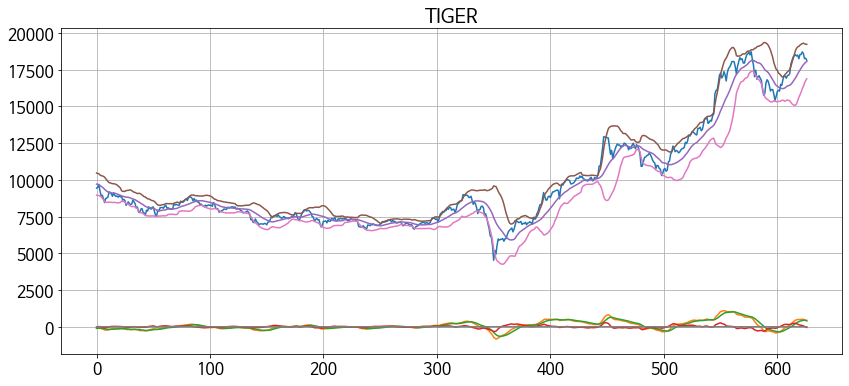

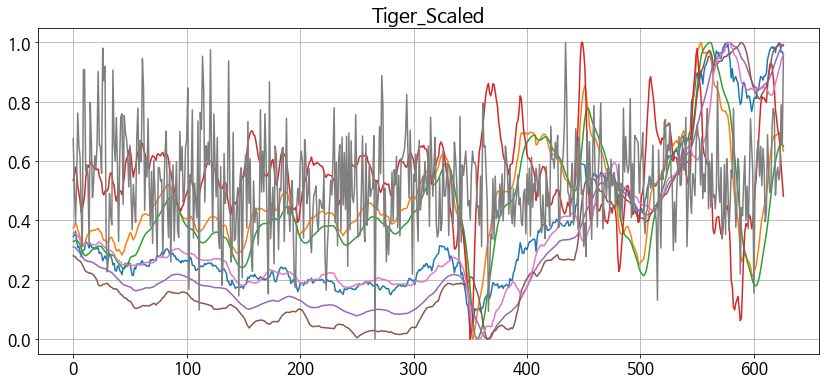

In [37]:
Tiger = np.array(Tiger).reshape(-1,8)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

In [38]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0:8])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y) # array()함수의 인자로 리스트를 넣어 Numpy 배열을 생성시킴
print(X.shape, y.shape)

(626, 1, 8) (626,)


In [39]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]    

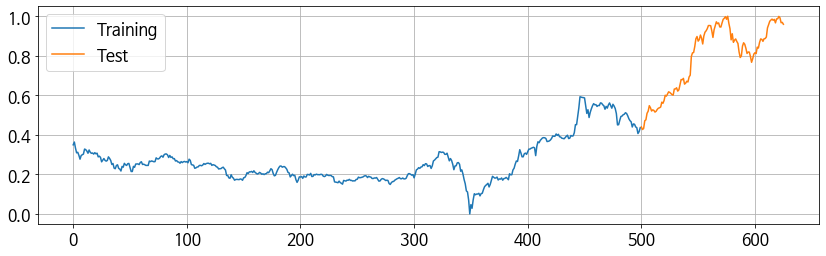

In [40]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [41]:
X_train = X_train.reshape(-1,1,8)
X_test = X_test.reshape(-1,1,8)

###LSTM

In [42]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],8)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 5ms/step - loss: 0.2435
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1789
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0964
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0810
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0714
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0728
Epoch 8/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0559
Epoch 10/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0531


###결과

In [43]:
y_pred = regressor.predict(X_test)
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 32)             5248      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)               

Text(0, 0.5, 'Price')

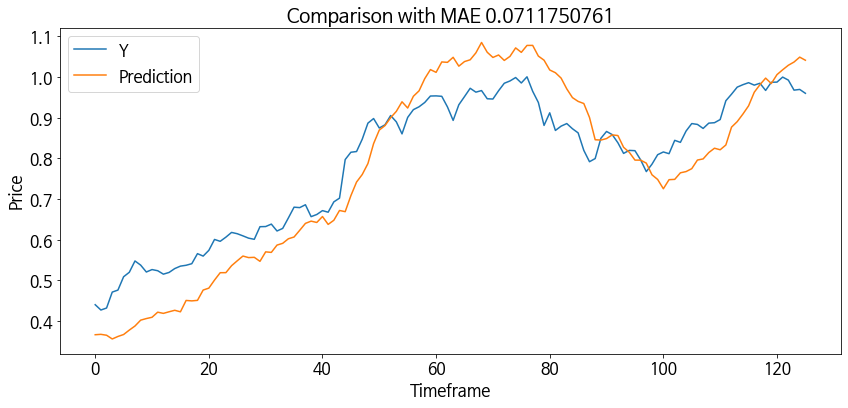

In [44]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [45]:
err_model3 = regressor.evaluate(X_test, y_test, batch_size=30)

models = pd.DataFrame({
    'Model': ['LSTM with Only Close', 'LSTM with Close, Technical Analysis','LSTM with Close, Technical Analysis, Sentimental Score'],
    'Score': [err_model1,err_model2,err_model3]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 3ms/step - loss: 0.0712


,Model,Score
2,"LSTM with Close, Technical Analysis, Sentiment...",0.071175
1,"LSTM with Close, Technical Analysis",0.096377
0,LSTM with Only Close,0.351895


## Case 4. 뉴스감성점수와 종가만 이용

###데이터 준비

In [46]:
Tiger = pd.read_excel('/content/Tiger.xlsx', index_col=0)

Tiger.drop(['macd',	'macds',	'macdo',	'bb_bbm',	'bb_bbh', 'bb_bbl'],axis=1,inplace=True)
Tiger

,종가,Score
날짜,,
2018-10-18,9435,0.304989
2018-10-19,9485,0.139543
2018-10-22,9685,0.004679
2018-10-23,9250,0.140723
2018-10-24,8910,0.397520
...,...,...
2021-04-26,18705,0.158912
2021-04-27,18600,0.192055
2021-04-28,18250,0.426701


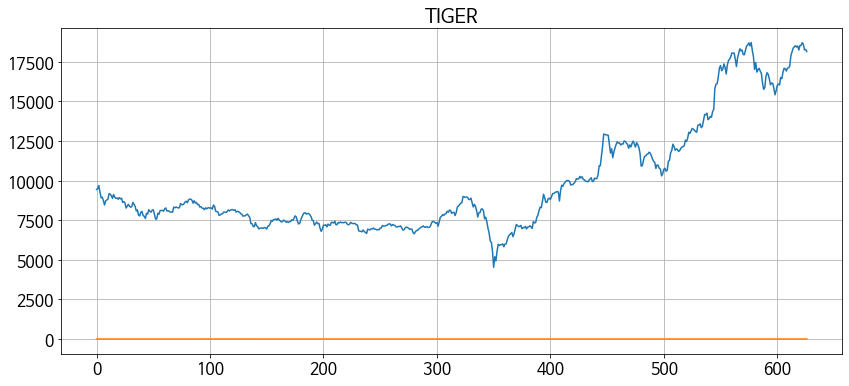

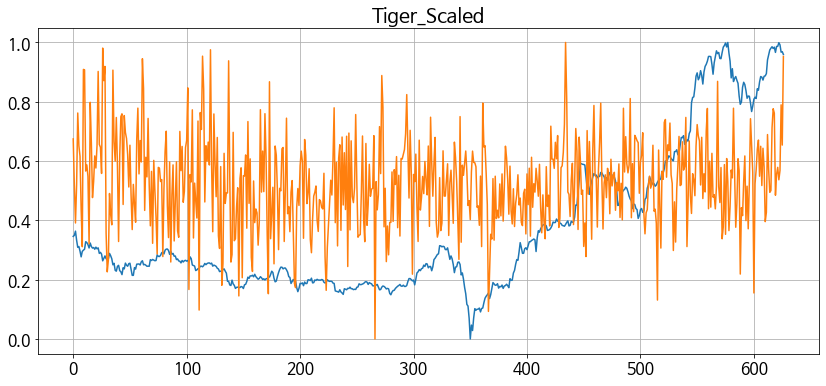

In [47]:
Tiger = np.array(Tiger).reshape(-1,2)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

In [48]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0:2])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y) # array()함수의 인자로 리스트를 넣어 Numpy 배열을 생성시킴
print(X.shape, y.shape)

(626, 1, 2) (626,)


In [49]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]    

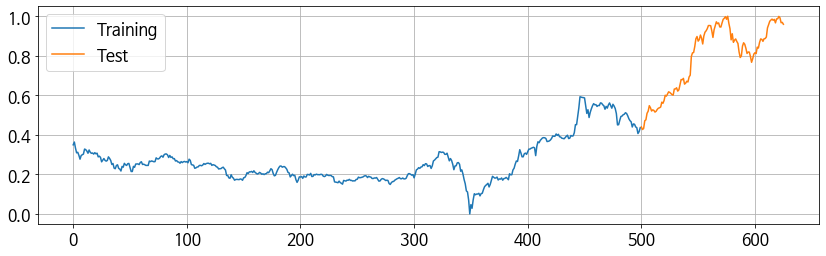

In [50]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [51]:
X_train = X_train.reshape(-1,1,2)
X_test = X_test.reshape(-1,1,2)

###LSTM

In [52]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],2)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 5ms/step - loss: 0.2552
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1959
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.1112
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0902
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0947
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0923
Epoch 8/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0806
Epoch 9/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0836


###결과

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 32)             4480      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)               

Text(0, 0.5, 'Price')

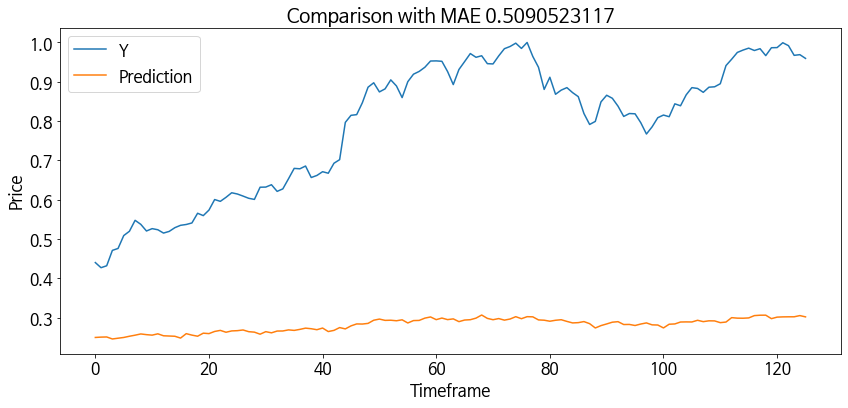

In [55]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [56]:
err_model4 = regressor.evaluate(X_test, y_test, batch_size=30)

models = pd.DataFrame({
    'Model': ['Only Close', 'Close + Technical Analysis','Close +  Technical Analysis + Sentimental Score' ,'Close + Sentimental Score'],
    'Score': [err_model1,err_model2,err_model3,err_model4]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 3ms/step - loss: 0.5091


,Model,Score
2,Close + Technical Analysis + Sentimental Score,0.071175
1,Close + Technical Analysis,0.096377
0,Only Close,0.351895
3,Close + Sentimental Score,0.509052


## Case 5.nohlcv만 이용

### 데이터 준비

In [57]:
#Tiger
Tiger = stock.get_etf_ohlcv_by_date("20180912","20210430",'305540')
Tiger.drop(['거래대금','기초지수'],axis=1,inplace=True)
Tiger

,NAV,시가,고가,저가,종가,거래량
날짜,,,,,,
2018-09-12,9806.70,10045,10050,9710,9805,577420
2018-09-13,9802.79,9795,9910,9720,9805,588068
2018-09-14,9955.93,9845,9960,9820,9915,558214
2018-09-17,10009.36,10000,10025,9920,10015,485143
2018-09-18,10223.50,9940,10230,9925,10220,501884
...,...,...,...,...,...,...
2021-04-26,18740.03,18585,18705,18390,18705,1415554
2021-04-27,18679.34,18710,18730,18570,18600,1187081
2021-04-28,18221.67,18505,18545,18100,18250,1019129


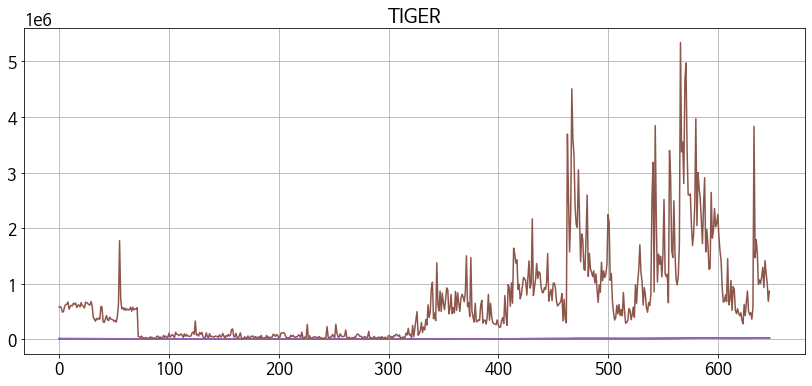

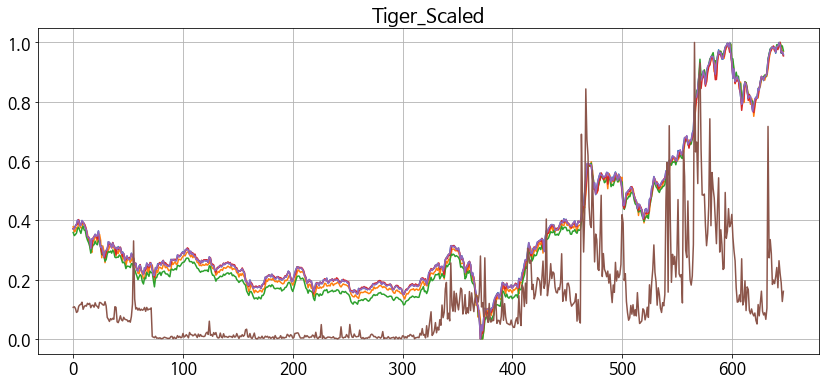

In [58]:
Tiger = np.array(Tiger).reshape(-1,6)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

In [59]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0:6])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(647, 1, 6) (647,)


In [60]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]   

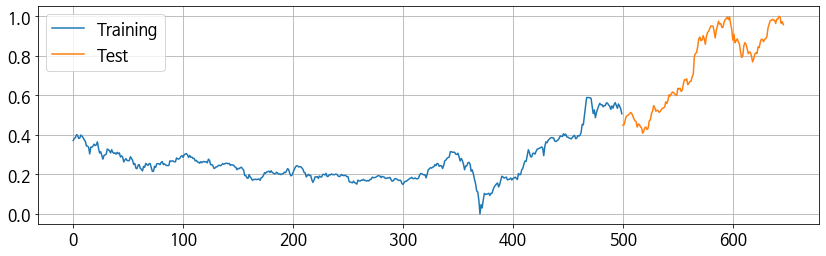

In [61]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [62]:
X_train = X_train.reshape(-1,1,6)
X_test = X_test.reshape(-1,1,6)

### LSTM

In [63]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],6)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 5ms/step - loss: 0.2462
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1750
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0858
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0779
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0746
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0649
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0579
Epoch 8/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0523
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0515


###결과

In [64]:
y_pred = regressor.predict(X_test)
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 32)             4992      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)               

Text(0, 0.5, 'Price')

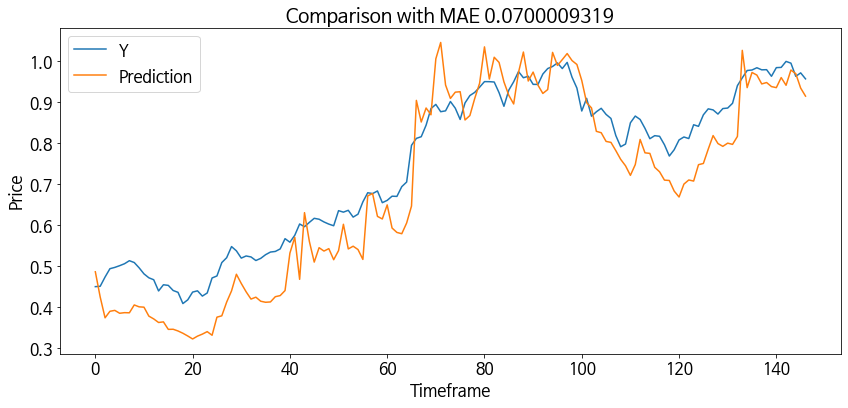

In [65]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [66]:
err_model5 = regressor.evaluate(X_test, y_test, batch_size=30)

models = pd.DataFrame({
    'Model': ['Only Close', 'Close + Technical Analysis','Close +  Technical Analysis + Sentimental Score' ,'Close + Sentimental Score','nohlcv'],
    'Score': [err_model1,err_model2,err_model3,err_model4,err_model5]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 3ms/step - loss: 0.0700


,Model,Score
4,nohlcv,0.070001
2,Close + Technical Analysis + Sentimental Score,0.071175
1,Close + Technical Analysis,0.096377
0,Only Close,0.351895
3,Close + Sentimental Score,0.509052


## Case 6. 전부 사용

### 데이터 준비

In [67]:
#Tiger
Tiger = stock.get_etf_ohlcv_by_date("20180912","20210430",'305540')
Tiger = get_macd(Tiger)

# Clean NaN values
Tiger = dropna(Tiger)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=Tiger["종가"], window=20, window_dev=2)

# Add Bollinger Bands features
Tiger['bb_bbm'] = indicator_bb.bollinger_mavg()
Tiger['bb_bbh'] = indicator_bb.bollinger_hband()
Tiger['bb_bbl'] = indicator_bb.bollinger_lband()

Tiger = Tiger.dropna(axis=0)

Tiger.drop(['거래대금','기초지수'],axis=1,inplace=True)
Tiger

,NAV,시가,고가,저가,종가,거래량,macd,macds,macdo,bb_bbm,bb_bbh,bb_bbl
날짜,,,,,,,,,,,,
2018-10-18,9438.32,9535,9535,9385,9435,604672,-107.845213,-99.374469,-8.470744,9706.50,10459.859808,8953.140192
2018-10-19,9492.81,9290,9490,9210,9485,594499,-97.964010,-99.090702,1.126692,9685.00,10437.874492,8932.125508
2018-10-22,9706.25,9420,9685,9360,9685,561184,-75.383826,-94.326830,18.943004,9668.50,10406.030338,8930.969662
2018-10-23,9250.74,9685,9685,9155,9250,665153,-87.173215,-92.890681,5.717467,9620.00,10333.260121,8906.739879
2018-10-24,8909.39,9400,9400,8820,8910,661250,-119.202672,-98.169032,-21.033639,9557.50,10289.357227,8825.642773
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,18740.03,18585,18705,18390,18705,1415554,512.203780,425.322976,86.880804,17723.00,19259.253234,16186.746766
2021-04-27,18679.34,18710,18730,18570,18600,1187081,506.255144,441.509410,64.745734,17828.00,19301.313952,16354.686048
2021-04-28,18221.67,18505,18545,18100,18250,1019129,467.905015,446.788531,21.116484,17919.00,19254.015356,16583.984644


In [68]:
Tiger.to_excel('Tiger_all.xlsx')

In [74]:
Tiger = pd.read_excel('/content/Tiger_all.xlsx', index_col=0)
Tiger

,NAV,시가,고가,저가,종가,거래량,macd,macds,macdo,bb_bbm,bb_bbh,bb_bbl,Score
날짜,,,,,,,,,,,,,
2018-10-18,9438.32,9535,9535,9385,9435,604672,-107.845213,-99.374469,-8.470744,9706.50,10459.859808,8953.140192,0.304989
2018-10-19,9492.81,9290,9490,9210,9485,594499,-97.964010,-99.090702,1.126692,9685.00,10437.874492,8932.125508,0.139543
2018-10-22,9706.25,9420,9685,9360,9685,561184,-75.383826,-94.326830,18.943004,9668.50,10406.030338,8930.969662,0.004679
2018-10-23,9250.74,9685,9685,9155,9250,665153,-87.173215,-92.890681,5.717467,9620.00,10333.260121,8906.739879,0.140723
2018-10-24,8909.39,9400,9400,8820,8910,661250,-119.202672,-98.169032,-21.033639,9557.50,10289.357227,8825.642773,0.397520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,18740.03,18585,18705,18390,18705,1415554,512.203780,425.322976,86.880804,17723.00,19259.253234,16186.746766,0.158912
2021-04-27,18679.34,18710,18730,18570,18600,1187081,506.255144,441.509410,64.745734,17828.00,19301.313952,16354.686048,0.192055
2021-04-28,18221.67,18505,18545,18100,18250,1019129,467.905015,446.788531,21.116484,17919.00,19254.015356,16583.984644,0.426701


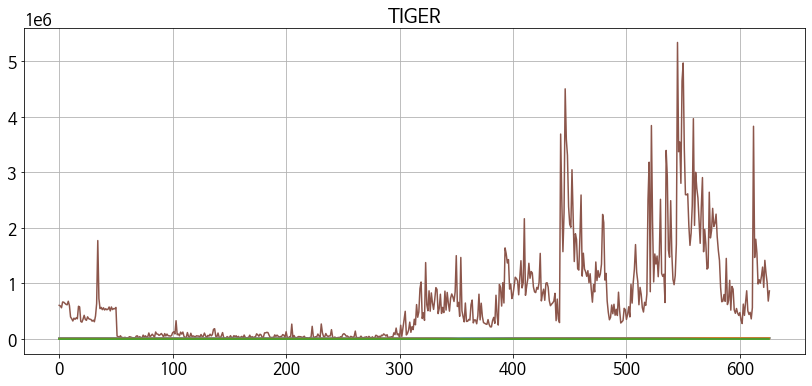

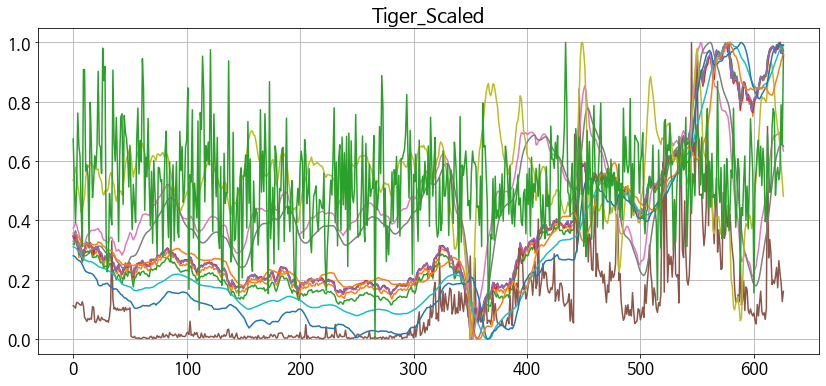

In [75]:
Tiger = np.array(Tiger).reshape(-1,13)
plt.figure(figsize=(14,6))
plt.title("TIGER")
plt.grid()
plt.plot(Tiger)

sc = MinMaxScaler()
TigerSC = sc.fit_transform(Tiger)
plt.figure(figsize=(14,6))
plt.title("Tiger_Scaled")
plt.grid()
plt.plot(TigerSC)

In [76]:
X = []
y = []
for i in range(1, len(TigerSC)):
    X.append(TigerSC[i-1:i, 0:13])
    y.append(TigerSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(626, 1, 13) (626,)


In [77]:
X_train = X[:500,:]
X_test = X[500:,:]

y_train = y[:500]
y_test = y[500:]   

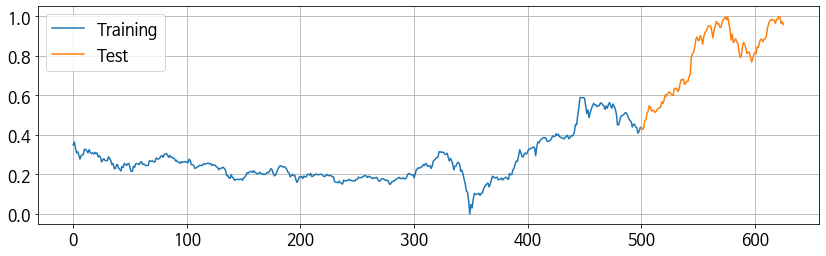

In [78]:
plt.figure(figsize=(14,4))
plt.plot(range(500),y_train)
plt.plot(range(500, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [79]:
X_train = X_train.reshape(-1,1,13)
X_test = X_test.reshape(-1,1,13)

###LSTM

In [80]:
regressor = Sequential()

regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],13)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
17/17 [==============================] - 6s 5ms/step - loss: 0.2478
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1915
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0905
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0760
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0653
Epoch 8/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0616
Epoch 9/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 10/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0521


###결과

In [81]:
y_pred = regressor.predict(X_test)
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 32)             5888      
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)               

Text(0, 0.5, 'Price')

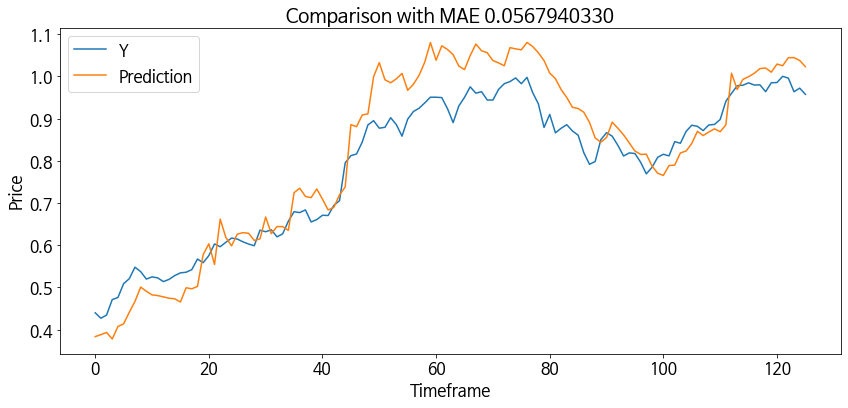

In [82]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(mean_absolute_error(y_test, y_pred)))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [83]:
err_model6 = regressor.evaluate(X_test, y_test, batch_size=30)

models = pd.DataFrame({
    'Model': ['Only Close', 'Close + Technical Analysis','Close +  Technical Analysis + Sentimental Score' ,'Close + Sentimental Score','nohlcv', 'ALL'],
    'Score': [err_model1,err_model2,err_model3,err_model4,err_model5 ,err_model6]})
models.sort_values(by='Score', ascending=True)

5/5 [==============================] - 1s 4ms/step - loss: 0.0568


,Model,Score
5,ALL,0.056794
4,nohlcv,0.070001
2,Close + Technical Analysis + Sentimental Score,0.071175
1,Close + Technical Analysis,0.096377
0,Only Close,0.351895
3,Close + Sentimental Score,0.509052
